In [12]:
import pandas as pd
import numpy as np
 

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [13]:
cdata=pd.read_csv('auto-mpg.csv')
cdata.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [20]:
cdata=cdata.drop(['origin','car name'], axis=1)

In [21]:
cdata

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393          82  
394          82  
395          82  
396          82  
397          82  

[398 rows x 7 columns]

In [22]:
hpisdigit= pd.DataFrame(cdata.horsepower.str.isdigit())
cdata[hpisdigit['horsepower']==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82

In [23]:
cdata= cdata.replace('?', np.nan)

In [24]:
cdata[hpisdigit['horsepower']==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0        NaN    2046          19.0   
126  21.0          6         200.0        NaN    2875          17.0   
330  40.9          4          85.0        NaN    1835          17.3   
336  23.6          4         140.0        NaN    2905          14.3   
354  34.5          4         100.0        NaN    2320          15.8   
374  23.0          4         151.0        NaN    3035          20.5   

     model year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82

In [25]:
cdata.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [26]:
medianfiller= lambda x:x.fillna(x.median())

In [27]:
cdata=cdata.apply(medianfiller, axis=0)
cdata['horsepower']=cdata['horsepower'].astype('float64')

In [28]:
x=cdata.drop('mpg', axis=1)
y=cdata[['mpg']]
x.head()

cylinders  displacement  horsepower  weight  acceleration  model year
0          8         307.0       130.0    3504          12.0          70
1          8         350.0       165.0    3693          11.5          70
2          8         318.0       150.0    3436          11.0          70
3          8         304.0       150.0    3433          12.0          70
4          8         302.0       140.0    3449          10.5          70

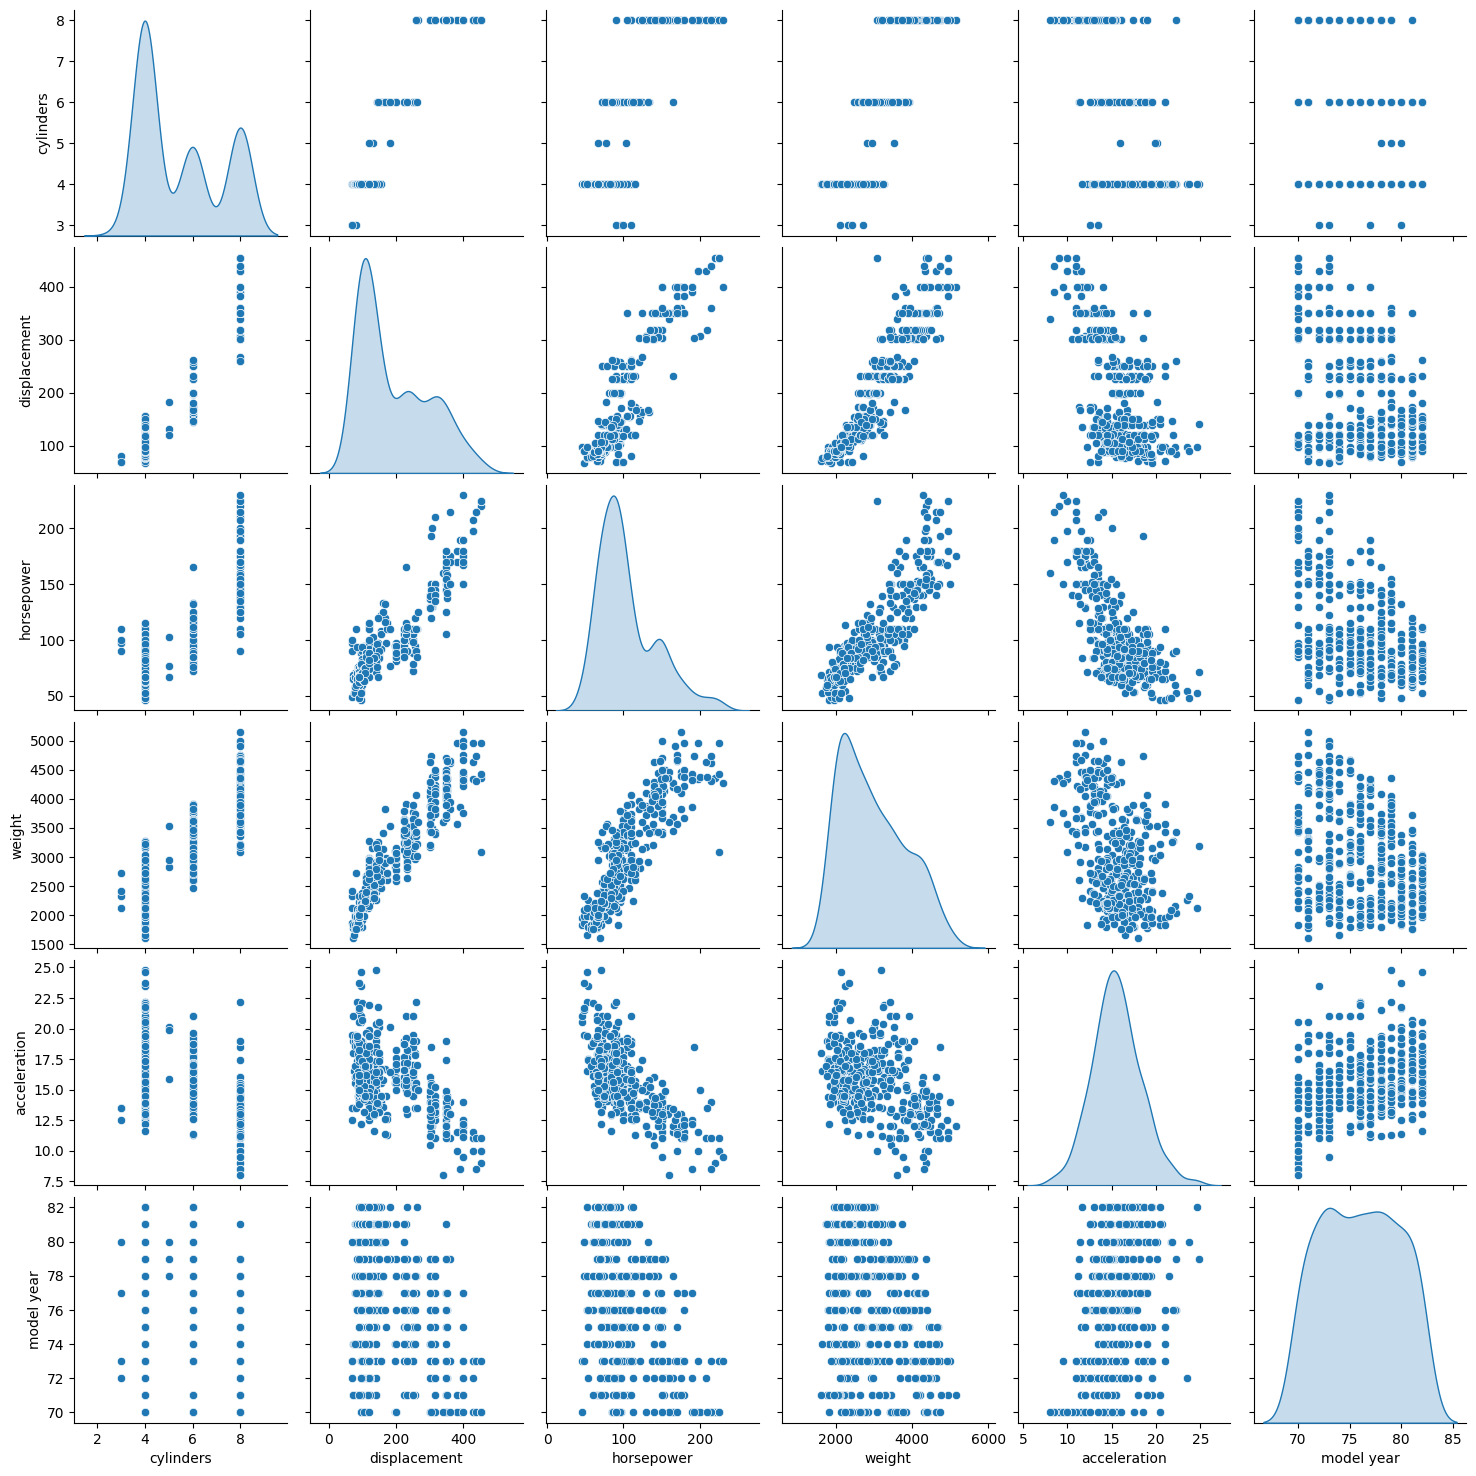

In [30]:
sns.pairplot(x, diag_kind='kde')

## Scale the data

In [33]:
from scipy.stats import zscore
XScaled= x.apply(zscore) 
XScaled.head()

cylinders  displacement  horsepower    weight  acceleration  model year
0   1.498191      1.090604    0.673118  0.630870     -1.295498   -1.627426
1   1.498191      1.503514    1.589958  0.854333     -1.477038   -1.627426
2   1.498191      1.196232    1.197027  0.550470     -1.658577   -1.627426
3   1.498191      1.061796    1.197027  0.546923     -1.295498   -1.627426
4   1.498191      1.042591    0.935072  0.565841     -1.840117   -1.627426

## Find the covariance matrix

In [34]:
covariance = np.cov(XScaled, rowvar=False)
print(covariance)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]
